In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
def taylor_seno32(angulo, tol=10e-8):
  seno = 0
  real = math.sin(angulo)
  i = 0
  while abs(real - seno) > tol:
    seno += ((-1)**i * angulo**(2*i + 1))/ (math.factorial(2*i + 1))
    i += 1
  return i, seno

In [ ]:
# Aqui va su código
def taylor_seno32_2(angulo, tol):
  max_iter = 100
  seno = 0
  real = math.sin(angulo)
  i = 0
  errors = np.zeros(max_iter)
  iteraciones = np.arange(max_iter)
  while abs(real - seno) > tol:
    seno += ((-1)**i * angulo**(2*i + 1))/ (math.factorial(2*i + 1))
    error = abs(real-seno)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], seno

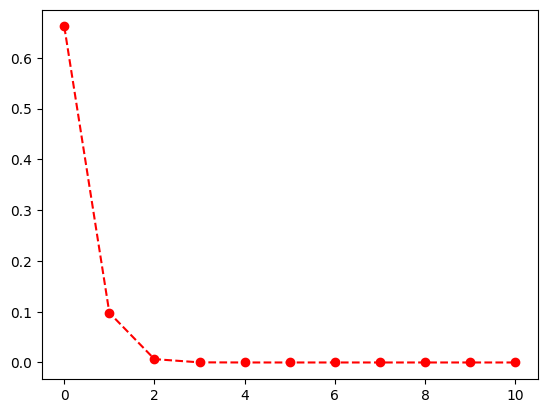

In [ ]:
x = math.radians(95)
tol = np.finfo(np.float64).eps
er, N, seno = taylor_seno32_2(x,tol)
plt.plot(N, er, 'ro--')
plt.show()


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
def exp(x,tol):
  exp = 0
  real = np.exp(-x)
  i = 0
  while abs(real - exp) > tol:
    exp += (((-1)**i) * (x**i)) / (math.factorial(i))
    i += 1
  return i, exp

In [ ]:
def exp_acotado(x):
  exp = 0
  real = np.exp(-x)
  i = 0
  termino2 = 1
  while abs(termino2) > abs(10e-7*(exp)):
    termino2 = ((-1)**(i+1)) * (x**(i+1)) / (math.factorial(i))
    termino =  (((-1)**i) * (x**i)) / (math.factorial(i))
    exp += termino
    i += 1
  return i, exp

In [ ]:
def exp10(x):
  i = 0
  exp2 = 0
  l_exp = []
  while i < 11:
    exp = (((-1)**i) * (x**i)) / (math.factorial(i))
    exp2 += exp
    l_exp.append(exp)
    i += 1
  return l_exp, exp2

0.4065696670509398
[1.9, -1.3050000000000002, 0.5265000000000001, -0.1488375, 0.03225825, -0.0056588625, 0.0008330126785714286, -0.0001055764486607143, 1.1743897098214288e-05, -1.163713439732143e-06]


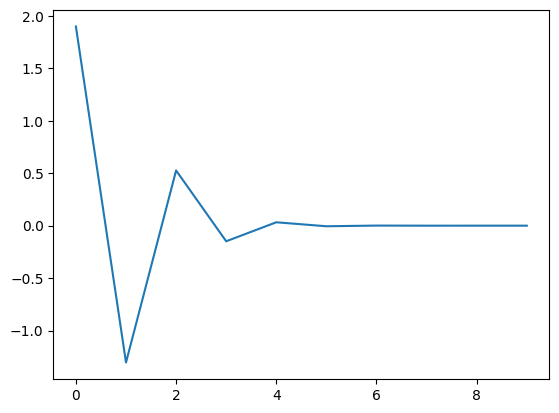

In [ ]:
l_exp, exp = exp10(0.9)
difference_l = []
for i in range(10):
  difference = l_exp[i] - l_exp[i+1]
  difference_l.append(difference)
print(exp)
print(difference_l)
plt.plot(difference_l)
plt.show()



In [ ]:
def exp10_2(x):
  i = 0
  l_exp = []
  exp2 = 0
  while i < 11:
    exp = (((1)**i) * (x**i))/(math.factorial(i))
    exp2 += exp
    l_exp.append(1/exp)
    i += 1
  return l_exp, 1/exp2

0.4065696611447882
[-0.11111111111111116, -1.3580246913580245, -5.761316872427983, -28.349336991312303, -166.641264034954, -1151.5859709732595, -9182.580945015532, -83128.28287199853, -842991.0375751964, -9470640.051770724]


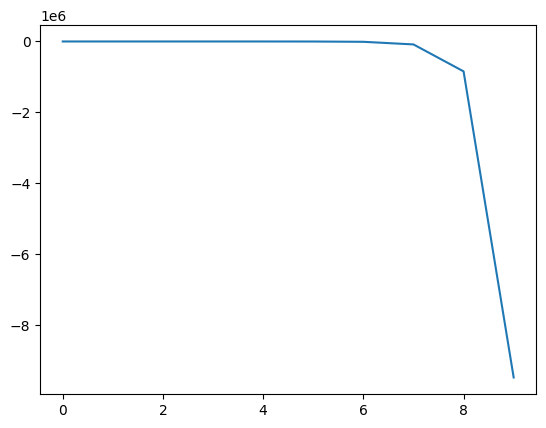

In [ ]:
l_exp, exp = exp10_2(0.9)
difference_l = []
for i in range(10):
  difference = l_exp[i] - l_exp[i+1]
  difference_l.append(difference)
print(exp)
print(difference_l)
plt.plot(difference_l)
plt.show()

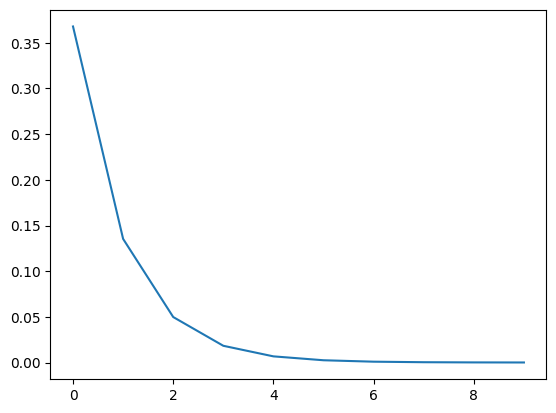

In [ ]:
lista = []
f = lambda x: exp(x)
for x in range(1,11):
  i, exp = exp_acotado(x)
  lista.append(exp)
plt.plot(lista)
plt.show()

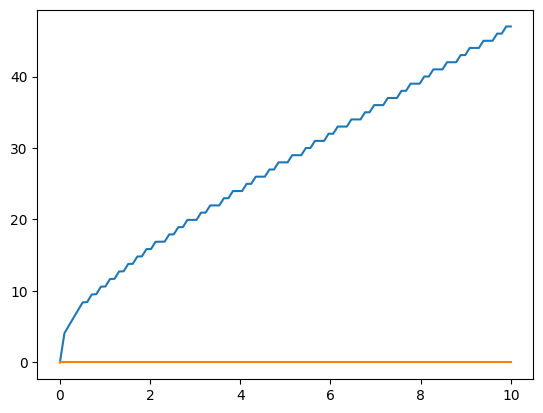

In [ ]:
Lista_error = []
N = np.linspace(0, 10, 100)
for n in N:
 x = abs(exp_acotado(n) - np.exp(-n))
 Lista_error.append(x)
array_error = np.array(Lista_error)
plt.plot(N, array_error)
plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
def Sn1(n,a):
  n = int(n)
  suma = 0
  l_suma = []
  for i in range(1,2*n+1):
    suma += ((-1)**i)*(i/(i+1))
    l_suma.append(suma)
  if a == 1:
    return suma
  else:

    return suma, np.array(l_suma)

In [ ]:
def Sn2(n,a):
  n = int(n)
  suma = 0
  l_suma = []
  for i in range(1,n+1):
    suma += ((-1)**i) * ((2*i-1)/(2*i)) + ((-1)**i) * ((2*i)/(2*i+1))
    l_suma.append(suma)
  if a == 1:
    return suma
  else:
    return suma, np.array(l_suma)

In [ ]:
def Sn3(n,a):
  n = int(n)
  suma = 0
  l_suma = []
  for i in range(1,n+1):
    suma += 1/(2*i*(2*i+1))
    l_suma.append(suma)
  if a == 1:
    return suma
  else:
    return suma, l_suma

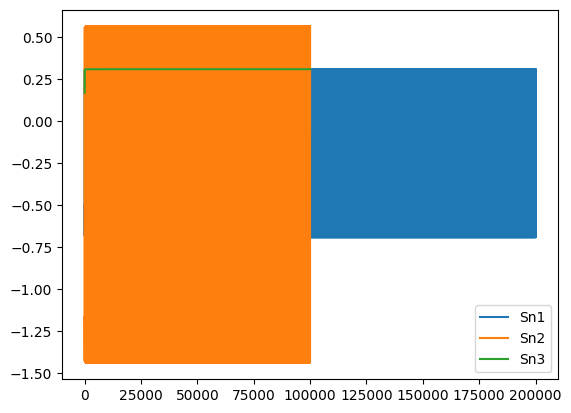

In [ ]:
# Aqui va su código

n = 100000
np.linspace(0,n, n)
s1, l1 = Sn1(n,0)
s2, l2 = Sn2(n,0)
s3, l3 = Sn3(n,0)
plt.plot(l1, label = 'Sn1')
plt.plot(l2, label = 'Sn2')
plt.plot(l3, label = 'Sn3')
plt.legend()
plt.show()



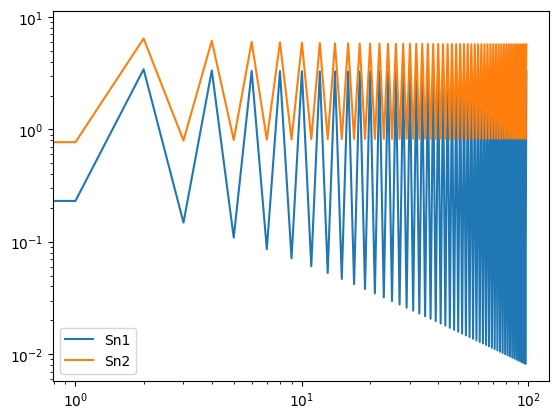

In [ ]:
n = 100
s1, l1 = Sn1(2*n,0)
s2, l2 = Sn2(n,0)
s3, l3 = Sn3(n,0)
lista1 = []
lista2 = []
for i in range(0, len(l3)-1):
  E = abs((l1[i]-l3[i])/l3[i])
  E2 = abs((l2[i]-l3[i])/l3[i])
  lista1.append(E)
  lista2.append(E2)
array1 = np.array(lista1)
array2 = np.array(lista2)
plt.loglog(array1, label = 'Sn1')
plt.loglog(array2, label = 'Sn2')
plt.legend()
plt.show()

